In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Loading files

We load the files here. Notice that the following notation for the variables is used:
- `_ln` for linear entanglement and normal disposition, which means we first apply all the feature maps and then all the ansatz
- `_la` for linear entanglement and alternated disposition, which means we apply alternating feature maps and ansatz
- `_fn` for full entanglement and normal disposition, which means we first apply all the feature maps and then all the ansatz
- `_fa` for full entanglement and alternated disposition, which means we apply alternating feature maps and ansatz

In [3]:
def _read_filename_list(PATH, filename_list):
    """Read a list of filenames formatted as expected by the algorithm

    Parameters
    ----------
    PATH : str
        PATH to the filename directory
    filename_list : list of str
        filenames

    Returns
    -------
    res : dict
        Dictionary that contains the average and std of the values for different
        number of qubits. Has keys ['avg', 'std']. The values are dictionaries, where
        the keys are the number of qubits and the values the np.ndarray of the data
    """
    avg = {}
    std = {}
    for name in filename_list:
        num_qubits = int(name[ name.find('_')+1:name.find('qubits') ])
        if 'avg' in name:
            avg[num_qubits] = np.loadtxt(PATH+name)
        else:
            std[num_qubits] = np.loadtxt(PATH+name)

    res = {}
    res['avg'] = avg
    res['std'] = std

    return res

def read_files(PATH):
    """Read all files in the directory PATH

    Parameters
    ----------
    PATH : str
        PATH to the directory where we want to read the files

    Returns
    -------
    entanglement : dict
        Dictionary that contains the average and std of the entanglement for different
        number of qubits. Has keys ['avg', 'std']. The values are dictionaries, where
        the keys are the number of qubits and the values the np.ndarray of the data
    bond_dim : dict
        Dictionary that contains the average and std of the bond dimension for different
        number of qubits. Has keys ['avg', 'std']. The values are dictionaries, where
        the keys are the number of qubits and the values the np.ndarray of the data
    """
    if not os.path.isdir(PATH):
        raise ValueError(f'{PATH} is not a directory')

    files = [f for f in os.listdir(PATH)]

    entanglement_filenames = [f for f in files if 'entantglement' in f]
    bond_dim_filenames = [f for f in files if 'bonddim' in f]

    entanglement = _read_filename_list(PATH, entanglement_filenames)
    bond_dim = _read_filename_list(PATH, bond_dim_filenames)

    return entanglement, bond_dim

## Linear entanglement

### Normal disposition

In [4]:
# LOADING FILE NAMES (_ln stands for linear normal)
PATH_ln = '/results/linear/normal/'

entanglement_ln, bond_dim_ln = read_files(PATH_ln)

bd_avg_ln = bond_dim_ln['avg']
bd_std_ln = bond_dim_ln['std']

ent_avg_ln = entanglement_ln['avg']
ent_std_ln = entanglement_ln['std']

# Now, you have the data arranged in dictionaries. The label is the number of qubits. The value is a 3x3 np.ndarray arranged with
# ansatz repetition on the rows and feature map repetitions on the columns, as follows
# (1, 1) (1, 3), (1, 5)
# (3, 1) (3, 3), (3, 5)
# (5, 1) (5, 3), (5, 5) 

ValueError: ../qml_data/results/linear/normal/ is not a directory

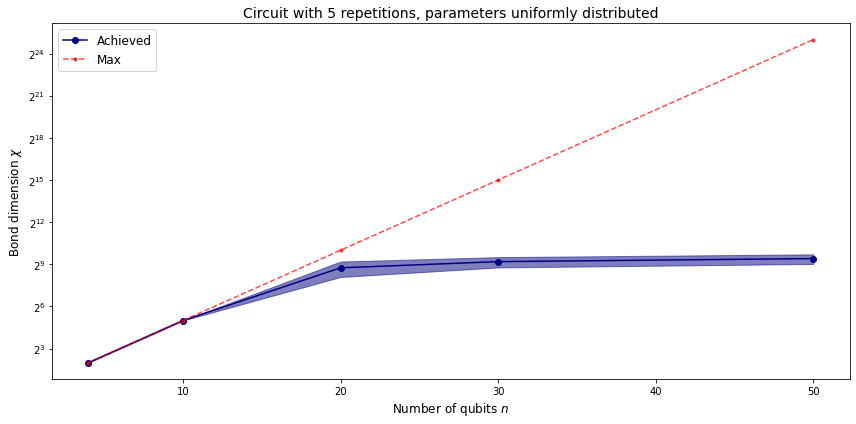

In [5]:

fig, ax = plt.subplots( figsize=(12, 6) )
num_qubits_ln = np.array( np.sort( list(bd_avg_ln.keys() ) ) )
max_bond_dim_achieved_ln = np.array( [ bd_avg_ln[nq][2, 2] for nq in num_qubits_ln ] )
max_bond_dim_std_ln = np.array([ bd_std_ln[nq][2, 2] for nq in num_qubits_ln ])
max_bond_dim = np.array([ 2**(nq//2) for nq in num_qubits_ln ])

ax.plot(num_qubits_ln, max_bond_dim_achieved_ln, 'o-', color='navy', label='Achieved')
ax.plot(num_qubits_ln, max_bond_dim, '.--', color='red', label='Max', alpha=0.7)
ax.fill_between(num_qubits_ln, max_bond_dim_achieved_ln-max_bond_dim_std_ln, max_bond_dim_achieved_ln+max_bond_dim_std_ln, 
    color='navy', alpha=0.5)

ax.set_xlabel('Number of qubits $n$', fontsize=12)
ax.set_ylabel('Bond dimension $\\chi$', fontsize=12)
ax.set_yscale('log', base=2)
ax.set_title('Circuit with 5 repetitions, parameters uniformly distributed', fontsize=14)

ax.legend(fontsize=12)
plt.tight_layout()
#plt.show()
plt.savefig('max_bond_dim.png')

### Alternating disposition

In [6]:
# LOADING FILE NAMES (la denotes linear alternated)
PATH_la = 'results/linear/alternated/'

entanglement_la, bond_dim_la = read_files(PATH_la)

bd_avg_la = bond_dim_la['avg']
bd_std_la = bond_dim_la['std']

ent_avg_la = entanglement_la['avg']
ent_std_la = entanglement_la['std']

# Now, you have the data arranged in dictionaries. The label is the number of qubits. The value is a 4x1 np.ndarray arranged with
# where you have
# (1, 1) 
# (3, 3)
# (5, 5)
# (7, 7)

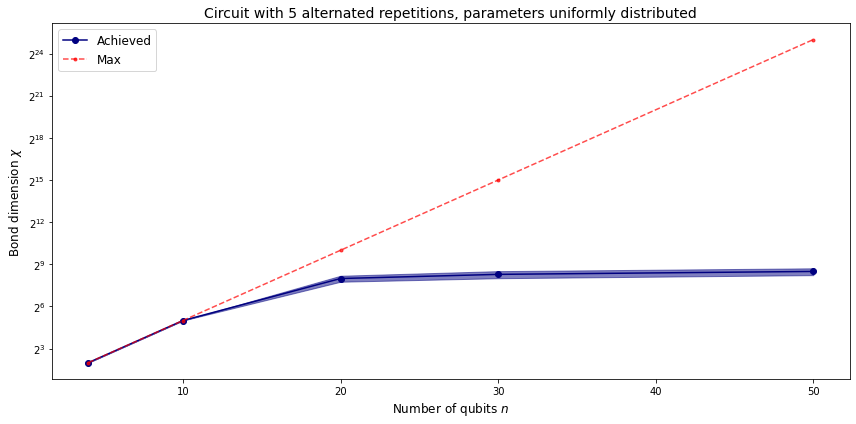

In [7]:
fig, ax = plt.subplots( figsize=(12, 6) )
num_qubits_la = np.array( np.sort( list(bd_avg_la.keys() ) ) )
max_bond_dim_achieved_la = np.array( [ bd_avg_la[nq][ 2] for nq in num_qubits_la ] )
max_bond_dim_std_la = np.array([ bd_std_la[nq][ 2] for nq in num_qubits_la ])
max_bond_dim_la = np.array([ 2**(nq//2) for nq in num_qubits_la ])

ax.plot(num_qubits_la, max_bond_dim_achieved_la, 'o-', color='navy', label='Achieved')
ax.plot(num_qubits_la, max_bond_dim_la, '.--', color='red', label='Max', alpha=0.7)
ax.fill_between(num_qubits_la, max_bond_dim_achieved_la-max_bond_dim_std_la, max_bond_dim_achieved_la+max_bond_dim_std_la, 
    color='navy', alpha=0.5)

ax.set_xlabel('Number of qubits $n$', fontsize=12)
ax.set_ylabel('Bond dimension $\\chi$', fontsize=12)
ax.set_yscale('log', base=2)
ax.set_title('Circuit with 5 alternated repetitions, parameters uniformly distributed', fontsize=14)

ax.legend(fontsize=12)
plt.tight_layout()
#plt.show()
plt.savefig('max_bond_dim.png')

# Plotting and analysis

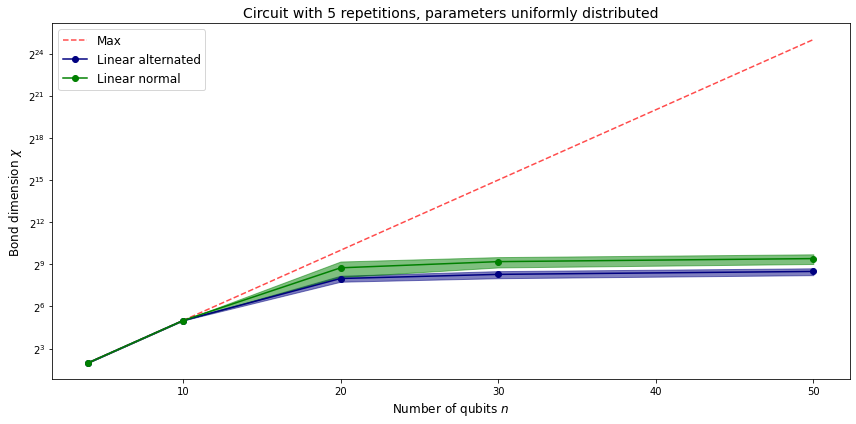

In [8]:
fig, ax = plt.subplots( figsize=(12, 6) )

reps_map = { 1:0, 3:1, 5:2, 7:3 }

reps = 5

# LA
num_qubits_la = np.array( np.sort( list(bd_avg_la.keys() ) ) )
max_bond_dim_achieved_la = np.array( [ bd_avg_la[nq][ reps_map[reps]] for nq in num_qubits_la ] )
max_bond_dim_std_la = np.array([ bd_std_la[nq][ reps_map[reps]] for nq in num_qubits_la ])
# LN
num_qubits_ln = np.array( np.sort( list(bd_avg_ln.keys() ) ) )
max_bond_dim_achieved_ln = np.array( [ bd_avg_ln[nq][reps_map[reps], reps_map[reps] ] for nq in num_qubits_ln ] )
max_bond_dim_std_ln = np.array([ bd_std_ln[nq][reps_map[reps], reps_map[reps] ] for nq in num_qubits_ln ])

max_bond_dim = np.array([ 2**(nq//2) for nq in num_qubits_la ])

# Maximum bond dimension for a correct representation
ax.plot(num_qubits_la, max_bond_dim, '--', color='red', label='Max', alpha=0.7)

# Maximum bond dimension achieved by a linear alternating scheme
ax.plot(num_qubits_la, max_bond_dim_achieved_la, 'o-', color='navy', label='Linear alternated')
ax.fill_between(num_qubits_la, max_bond_dim_achieved_la-max_bond_dim_std_la, max_bond_dim_achieved_la+max_bond_dim_std_la, 
    color='navy', alpha=0.5)
# Maximum bond dimension achieved by a linear normal scheme
ax.plot(num_qubits_ln, max_bond_dim_achieved_ln, 'o-', color='green', label='Linear normal')
ax.fill_between(num_qubits_ln, max_bond_dim_achieved_ln-max_bond_dim_std_ln, max_bond_dim_achieved_ln+max_bond_dim_std_ln, 
    color='green', alpha=0.5)


ax.set_xlabel('Number of qubits $n$', fontsize=12)
ax.set_ylabel('Bond dimension $\\chi$', fontsize=12)
ax.set_yscale('log', base=2)
ax.set_title(f'Circuit with {reps} repetitions, parameters uniformly distributed', fontsize=14)

ax.legend(fontsize=12)
plt.tight_layout()
#plt.show()

plt.savefig('max_bond_dim.pdf')

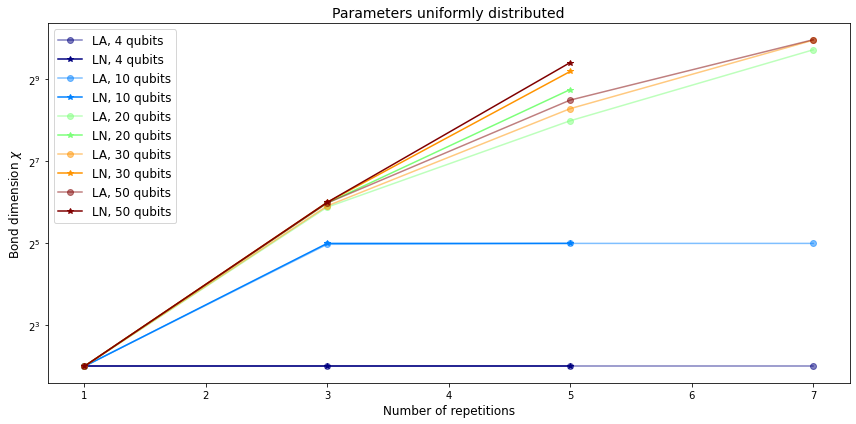

In [9]:
fig, ax = plt.subplots( figsize=(12, 6) )
num_qubits_la = np.array( np.sort( list(bd_avg_la.keys() ) ) )


max_bond_dim_achieved_la = np.array( [ bd_avg_la[nq][ 2] for nq in num_qubits_la ] )
max_bond_dim_std_la = np.array([ bd_std_la[nq][ 2] for nq in num_qubits_la ])
max_bond_dim_la = np.array([ 2**(nq//2) for nq in num_qubits_la ])

cm = plt.cm.jet(np.linspace(0, 1, 5) )
cmvs = plt.cm.viridis(np.linspace(0, 1, 5) )

# Maximum bond dimension achieved by a linear alternating scheme
for idx, nq in enumerate(num_qubits_la):
    ax.plot(np.arange(1, 8, 2), bd_avg_la[nq], 'o-', color=cm[idx], label=f'LA, {nq} qubits', alpha=0.5)
    ax.plot(np.arange(1, 6, 2), [bd_avg_ln[nq][ii, ii] for ii in range(3)], '*-', color=cm[idx], label=f'LN, {nq} qubits')

ax.set_xlabel('Number of repetitions', fontsize=12)
ax.set_ylabel('Bond dimension $\\chi$', fontsize=12)
ax.set_yscale('log', base=2)
ax.set_title('Parameters uniformly distributed', fontsize=14)

ax.legend(fontsize=12)
plt.tight_layout()
#plt.show()
plt.savefig('max_bond_dim.pdf')